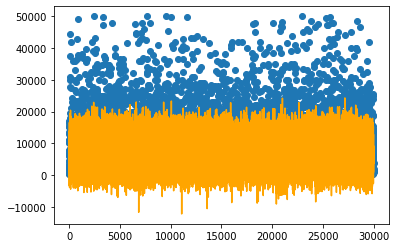

[[ 0.00000000e+00 -3.75896597e+01  5.57107428e-01 -4.87583592e+02
  -6.61344192e+01 -4.56152494e-03  4.57102758e+02  6.82846638e+02
   1.34760092e+02  1.74433802e+03  7.36624238e+01  9.06554512e+02
   7.44507994e+01  1.13399746e+03  0.00000000e+00  6.19353250e+02
   6.98944399e+02  4.83595379e+02  2.84217094e-14  1.10627361e+03
   1.11805894e+03  0.00000000e+00  0.00000000e+00]]


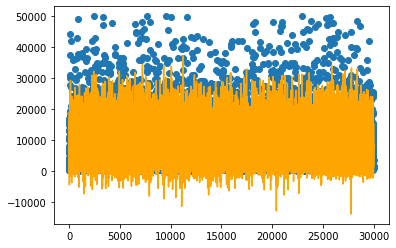

[[ 3.35668381e-01 -1.86819518e+03  2.06073974e+02  4.67118556e+05
  -1.93151438e+03  1.47270767e+00  3.73287234e+02 -9.55298529e+04
  -3.68032627e+05 -2.26758392e+05 -2.15287045e+04 -4.20377391e+04
  -1.31562698e+04  1.28657447e+05 -1.71057362e-01 -1.41194080e+05
  -3.10344243e+05  9.32305855e+04 -1.39743602e-01 -2.74456199e+05
  -1.96018017e+05  9.36020232e-03 -4.03941917e-03  1.60499319e-02
  -1.89943835e+01 -1.35635280e+00  8.89937510e-05  9.28424029e-01
  -5.27836556e+00 -2.32540288e+01 -2.02244293e+00 -4.40339234e-02
   2.48994962e+01 -1.31201440e-01  1.16124222e+01 -4.82978602e-04
   3.05928844e+01 -1.87029624e+01  8.87360594e+00 -9.01933659e-04
   6.45087190e+00 -1.61025466e+01  1.16286971e-04  1.52980841e-04
  -3.22568787e-01 -1.22388774e-02 -7.14677299e-06 -1.03191948e-01
   1.40236471e+00  2.16879720e-02 -3.53719700e-01  9.24192870e-02
   7.73467429e-01  3.95724646e-02  1.06360697e-01 -4.52317639e-05
   3.81961298e-02 -2.50431231e-01 -3.68249410e-01 -5.57017728e-07
   3.77128

In [92]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import sklearn

def FormatCSV(data, category, boolean):
    for i in category:
        value = 1
        for x in data.iloc[:, i].unique():
            data.iloc[:, i] = data.iloc[:, i].replace(to_replace = x, value = value)
            value += 1
    
    for i in boolean:
        value = 0
        for x in data.iloc[:, i].unique():
            data.iloc[:, i] = data.iloc[:, i].replace(to_replace = x, value = value)
            value = 1

data = pd.read_csv('X_train.csv')  # load data set
result = pd.read_csv('Y_train.csv')
data = data.sort_values(['id'])
result = result.sort_values(['id'])
category = [1, 2, 3, 4, 7, 8, 10, 11] 
boolean = [13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

FormatCSV(data, category, boolean)

index = data.id.values
X = data.drop(['id'], axis = 1).values
Y = result.drop(['id'], axis = 1).values # -1 means that calculate the dimension of rows, but have 1 column
X = np.nan_to_num(X)

#linear_regressor = LinearRegression()  # create object for the class
#linear_regressor.fit(X, Y)  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions
#print(Y_pred)
#print(X)

#plt.scatter(index, Y)
#plt.plot(index, Y_pred, color='red')
#plt.show()

#rmse = sklearn.metrics.mean_squared_error(Y, Y_pred)**0.5
#print(rmse)

from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2, interaction_only = True)
X_poly = pr.fit_transform(X)
pr.fit(X_poly, Y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
Y_pred = lin_reg.predict(pr.fit_transform(X))
plt.scatter(index, Y)
plt.plot(index, Y_pred, 'orange')
plt.show()
print(lin_reg.coef_)

rmse = sklearn.metrics.mean_squared_error(Y, Y_pred)**0.5
print(rmse)